# La porte du trésor E02: Les quatre chevelures

## Enoncé

Vous êtes Alice avec vos trois amis Bob, Charlie et Dahlia. Vous êtes placés en files sur des podiums de hauteurs différentes. 
Nous allons peindre en orange ou indigo nos chevelures de façon aléatoire.
Voici un ordre possible: chaque personne voit seulement les chevelures qui se trouvent devant elle.

Le défi, une fois les chevelures teintes, chaque personne ne peut mentionner qu'un mot c'est à dire
donner sa réponse en disant soit orange soit indigo.

La question est la suivante:
Quelle stratégie devez-vous mettre en place avec les autres joueurs et joueuses afin de déterminer la couleur de l'ensemble des chevelures avec la plus grande probabilité possible ?
   

## Solution à la question de l'énigme
Une des stratégies possibles implique le concept de parité avant de vous faire teindre les cheveux, vous vous êtes consulter et avait déterminé le code suivant:
si le nombre de chevelures indigo que je vois est pair je dis orange,
si le nombre de chevelures indigo que je vois et impair je dis indigo.

En procédant ainsi vous indiquer au reste des personnes une information cruciale la parité des chevelures indigo.
Vous vous trompez dans un cas sur deux sur la couleur de votre propre chevelure mais c'est sans importance vous donner ainsi à tout le monde la parité du nombre de chevelures indigo devant vous 
En effet chaque personne suivante pourra déduire la couleur de sa chevelure en fonction des réponses des personnes précédentes et du nombre pair ou impair de chevelures indigo qu'elle voit.



## Résolution

Voyons en détail le déroulement de cette stratégie lorsque nous prenons la répartition suivante de teinture:
- Vous voyez une chevelure indigo devant vous, comme un est un nombre impair vous dites indigo. 
- à son tour Bob compte un nombre impair de chevelures indigo sachant qu'en étant derrière lui vous en avez également vu un nombre impair il en déduit que sa propre chevelure est orange 
- Charlie y voit un nombre pair de chevelures indigo il sait qu'il y avait un nombre impair au départ et que Bob a une chevelure orange il en déduit que sa propre chevelure et indigo 
- finalement dahlia déduit que sa chevelure et orange à partir de la réponse des trois premières personnes 

Pour représenter cette énigme sur un ordinateur quantique, procédons comme suit.

### Import des bibliothèques

In [102]:
import numpy as np
from matplotlib import *
from qiskit import *

### Partie 1

In [103]:
# Dans notre raisonnement, 
# on considèrera que l'état 0 correspond à pair ou orange
# et que l'état 1 correspond à impair ou indigo

# Soit 4 qubit pour les personnages
# q0 pour Alice
# q1 pour Bob
# q2 pour Charlie
# q3 pour Dahlia

# et 4 autres qubit pour les raisonnements de nos 4 personnage
# q4 pour le raisonnement de Alice
# q5 pour le raisonnement de Bob
# q6 pour le raisonnement de Charlie
# q7 pour le raisonnement de Dahlia
possibilitiesR = QuantumRegister(8)

# Créons un registre classique pour y mesure nos réponses
measureR = ClassicalRegister(1)

# Créons le circuit
circ = QuantumCircuit(possibilitiesR, measureR)

In [104]:
# Affichons le cicruit
circ.draw()

q11_0: 
       
q11_1: 
       
q11_2: 
       
q11_3: 
       
q11_4: 
       
q11_5: 
       
q11_6: 
       
q11_7: 
       
 c7: 1/

In [105]:
# Plaçons la porte hadamard sur les qubits 0 à 3
# Tous les possibilités de teinture cohabite alors dans cette état quantique
# h = porte de Hadamard = superposition d'un qubit

circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)

# Affichons le circuit obtenu
circ.draw()

┌───┐
q11_0: ┤ H ├
       ├───┤
q11_1: ┤ H ├
       ├───┤
q11_2: ┤ H ├
       ├───┤
q11_3: ┤ H ├
       └───┘
q11_4: ─────
            
q11_5: ─────
            
q11_6: ─────
            
q11_7: ─────
            
 c7: 1/═════

### Partie 2

In [106]:
circ.barrier(0, 1, 2, 3, 4, 5, 6, 7)
circ.draw()

┌───┐ ░ 
q11_0: ┤ H ├─░─
       ├───┤ ░ 
q11_1: ┤ H ├─░─
       ├───┤ ░ 
q11_2: ┤ H ├─░─
       ├───┤ ░ 
q11_3: ┤ H ├─░─
       └───┘ ░ 
q11_4: ──────░─
             ░ 
q11_5: ──────░─
             ░ 
q11_6: ──────░─
             ░ 
q11_7: ──────░─
             ░ 
 c7: 1/════════

In [107]:
# Vous (Alice) regarderez les teintures devant vous 
# et avec des portes c-not, vous calculez
# s'il y a un nombre pair ou impair de chevelure indigo 

# Votre réponse se trouve ainsi consigné dans le qubit 4
circ.cx(1, 4)
circ.cx(2, 4)
circ.cx(3, 4)

circ.draw()

┌───┐ ░                
q11_0: ┤ H ├─░────────────────
       ├───┤ ░                
q11_1: ┤ H ├─░───■────────────
       ├───┤ ░   │            
q11_2: ┤ H ├─░───┼────■───────
       ├───┤ ░   │    │       
q11_3: ┤ H ├─░───┼────┼────■──
       └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐
q11_4: ──────░─┤ X ├┤ X ├┤ X ├
             ░ └───┘└───┘└───┘
q11_5: ──────░────────────────
             ░                
q11_6: ──────░────────────────
             ░                
q11_7: ──────░────────────────
             ░                
 c7: 1/═══════════════════════

### Partie 3

In [108]:
circ.barrier(0, 1, 2, 3, 4, 5, 6, 7)
circ.draw()

┌───┐ ░                 ░ 
q11_0: ┤ H ├─░─────────────────░─
       ├───┤ ░                 ░ 
q11_1: ┤ H ├─░───■─────────────░─
       ├───┤ ░   │             ░ 
q11_2: ┤ H ├─░───┼────■────────░─
       ├───┤ ░   │    │        ░ 
q11_3: ┤ H ├─░───┼────┼────■───░─
       └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q11_4: ──────░─┤ X ├┤ X ├┤ X ├─░─
             ░ └───┘└───┘└───┘ ░ 
q11_5: ──────░─────────────────░─
             ░                 ░ 
q11_6: ──────░─────────────────░─
             ░                 ░ 
q11_7: ──────░─────────────────░─
             ░                 ░ 
 c7: 1/══════════════════════════

In [109]:
# Les trois personnes suivantes entendent la réponse 
# et prenne en compte la parité des chevelures indigo

circ.cx(4, 5)
circ.cx(4, 6)
circ.cx(4, 7)
circ.draw()

┌───┐ ░                 ░                
q11_0: ┤ H ├─░─────────────────░────────────────
       ├───┤ ░                 ░                
q11_1: ┤ H ├─░───■─────────────░────────────────
       ├───┤ ░   │             ░                
q11_2: ┤ H ├─░───┼────■────────░────────────────
       ├───┤ ░   │    │        ░                
q11_3: ┤ H ├─░───┼────┼────■───░────────────────
       └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░                
q11_4: ──────░─┤ X ├┤ X ├┤ X ├─░───■────■────■──
             ░ └───┘└───┘└───┘ ░ ┌─┴─┐  │    │  
q11_5: ──────░─────────────────░─┤ X ├──┼────┼──
             ░                 ░ └───┘┌─┴─┐  │  
q11_6: ──────░─────────────────░──────┤ X ├──┼──
             ░                 ░      └───┘┌─┴─┐
q11_7: ──────░─────────────────░───────────┤ X ├
             ░                 ░           └───┘
 c7: 1/═════════════════════════════════════════

### Partie 4

In [110]:
circ.barrier(0, 1, 2, 3, 4, 5, 6, 7)
circ.draw()

┌───┐ ░                 ░                 ░ 
q11_0: ┤ H ├─░─────────────────░─────────────────░─
       ├───┤ ░                 ░                 ░ 
q11_1: ┤ H ├─░───■─────────────░─────────────────░─
       ├───┤ ░   │             ░                 ░ 
q11_2: ┤ H ├─░───┼────■────────░─────────────────░─
       ├───┤ ░   │    │        ░                 ░ 
q11_3: ┤ H ├─░───┼────┼────■───░─────────────────░─
       └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░                 ░ 
q11_4: ──────░─┤ X ├┤ X ├┤ X ├─░───■────■────■───░─
             ░ └───┘└───┘└───┘ ░ ┌─┴─┐  │    │   ░ 
q11_5: ──────░─────────────────░─┤ X ├──┼────┼───░─
             ░                 ░ └───┘┌─┴─┐  │   ░ 
q11_6: ──────░─────────────────░──────┤ X ├──┼───░─
             ░                 ░      └───┘┌─┴─┐ ░ 
q11_7: ──────░─────────────────░───────────┤ X ├─░─
             ░                 ░           └───┘ ░ 
 c7: 1/════════════════════════════════════════════

In [111]:
# Bob voit la couleur des chevelures devant lui 
# et s'en sert pour déterminer sa propre chevelure

circ.cx(2, 5)
circ.cx(3, 5)
circ.draw()

┌───┐ ░                 ░                 ░           
q11_0: ┤ H ├─░─────────────────░─────────────────░───────────
       ├───┤ ░                 ░                 ░           
q11_1: ┤ H ├─░───■─────────────░─────────────────░───────────
       ├───┤ ░   │             ░                 ░           
q11_2: ┤ H ├─░───┼────■────────░─────────────────░───■───────
       ├───┤ ░   │    │        ░                 ░   │       
q11_3: ┤ H ├─░───┼────┼────■───░─────────────────░───┼────■──
       └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░                 ░   │    │  
q11_4: ──────░─┤ X ├┤ X ├┤ X ├─░───■────■────■───░───┼────┼──
             ░ └───┘└───┘└───┘ ░ ┌─┴─┐  │    │   ░ ┌─┴─┐┌─┴─┐
q11_5: ──────░─────────────────░─┤ X ├──┼────┼───░─┤ X ├┤ X ├
             ░                 ░ └───┘┌─┴─┐  │   ░ └───┘└───┘
q11_6: ──────░─────────────────░──────┤ X ├──┼───░───────────
             ░                 ░      └───┘┌─┴─┐ ░           
q11_7: ──────░─────────────────░───────────┤ X ├─░───────────
             ░                 ░           └───┘ ░           
 c7: 1/══════════════════════════════════════════════════════

In [112]:
### Partie 5

In [113]:
circ.barrier(0, 1, 2, 3, 4, 5, 6, 7)
circ.draw()

┌───┐ ░                 ░                 ░            ░ 
q11_0: ┤ H ├─░─────────────────░─────────────────░────────────░─
       ├───┤ ░                 ░                 ░            ░ 
q11_1: ┤ H ├─░───■─────────────░─────────────────░────────────░─
       ├───┤ ░   │             ░                 ░            ░ 
q11_2: ┤ H ├─░───┼────■────────░─────────────────░───■────────░─
       ├───┤ ░   │    │        ░                 ░   │        ░ 
q11_3: ┤ H ├─░───┼────┼────■───░─────────────────░───┼────■───░─
       └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░                 ░   │    │   ░ 
q11_4: ──────░─┤ X ├┤ X ├┤ X ├─░───■────■────■───░───┼────┼───░─
             ░ └───┘└───┘└───┘ ░ ┌─┴─┐  │    │   ░ ┌─┴─┐┌─┴─┐ ░ 
q11_5: ──────░─────────────────░─┤ X ├──┼────┼───░─┤ X ├┤ X ├─░─
             ░                 ░ └───┘┌─┴─┐  │   ░ └───┘└───┘ ░ 
q11_6: ──────░─────────────────░──────┤ X ├──┼───░────────────░─
             ░                 ░      └───┘┌─┴─┐ ░            ░ 
q11_7: ──────░─────────────────░───────────┤ X ├─░────────────░─
             ░                 ░           └───┘ ░            ░ 
 c7: 1/═════════════════════════════════════════════════════════

In [114]:
# Les deux participants restant prennent en compte cette couleur
circ.cx(5, 6)
circ.cx(5, 7)
circ.draw()

┌───┐ ░                 ░                 ░            ░           
q11_0: ┤ H ├─░─────────────────░─────────────────░────────────░───────────
       ├───┤ ░                 ░                 ░            ░           
q11_1: ┤ H ├─░───■─────────────░─────────────────░────────────░───────────
       ├───┤ ░   │             ░                 ░            ░           
q11_2: ┤ H ├─░───┼────■────────░─────────────────░───■────────░───────────
       ├───┤ ░   │    │        ░                 ░   │        ░           
q11_3: ┤ H ├─░───┼────┼────■───░─────────────────░───┼────■───░───────────
       └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░                 ░   │    │   ░           
q11_4: ──────░─┤ X ├┤ X ├┤ X ├─░───■────■────■───░───┼────┼───░───────────
             ░ └───┘└───┘└───┘ ░ ┌─┴─┐  │    │   ░ ┌─┴─┐┌─┴─┐ ░           
q11_5: ──────░─────────────────░─┤ X ├──┼────┼───░─┤ X ├┤ X ├─░───■────■──
             ░                 ░ └───┘┌─┴─┐  │   ░ └───┘└───┘ ░ ┌─┴─┐  │  
q11_6: ──────░─────────────────░──────┤ X ├──┼───░────────────░─┤ X ├──┼──
             ░                 ░      └───┘┌─┴─┐ ░            ░ └───┘┌─┴─┐
q11_7: ──────░─────────────────░───────────┤ X ├─░────────────░──────┤ X ├
             ░                 ░           └───┘ ░            ░      └───┘
 c7: 1/═══════════════════════════════════════════════════════════════════

### Partie 6

In [115]:
circ.barrier(0, 1, 2, 3, 4, 5, 6, 7)
circ.draw()

┌───┐ ░                 ░                 ░            ░            ░ 
q11_0: ┤ H ├─░─────────────────░─────────────────░────────────░────────────░─
       ├───┤ ░                 ░                 ░            ░            ░ 
q11_1: ┤ H ├─░───■─────────────░─────────────────░────────────░────────────░─
       ├───┤ ░   │             ░                 ░            ░            ░ 
q11_2: ┤ H ├─░───┼────■────────░─────────────────░───■────────░────────────░─
       ├───┤ ░   │    │        ░                 ░   │        ░            ░ 
q11_3: ┤ H ├─░───┼────┼────■───░─────────────────░───┼────■───░────────────░─
       └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░                 ░   │    │   ░            ░ 
q11_4: ──────░─┤ X ├┤ X ├┤ X ├─░───■────■────■───░───┼────┼───░────────────░─
             ░ └───┘└───┘└───┘ ░ ┌─┴─┐  │    │   ░ ┌─┴─┐┌─┴─┐ ░            ░ 
q11_5: ──────░─────────────────░─┤ X ├──┼────┼───░─┤ X ├┤ X ├─░───■────■───░─
             ░                 ░ └───┘┌─┴─┐  │   ░ └───┘└───┘ ░ ┌─┴─┐  │   ░ 
q11_6: ──────░─────────────────░──────┤ X ├──┼───░────────────░─┤ X ├──┼───░─
             ░                 ░      └───┘┌─┴─┐ ░            ░ └───┘┌─┴─┐ ░ 
q11_7: ──────░─────────────────░───────────┤ X ├─░────────────░──────┤ X ├─░─
             ░                 ░           └───┘ ░            ░      └───┘ ░ 
 c7: 1/══════════════════════════════════════════════════════════════════════

In [116]:
# Charlie note la couleur couleur devant lui et annonce la couleur sa propre chevelure

circ.cx(3, 6)
circ.draw()

┌───┐ ░                 ░                 ░            ░            ░ »
q11_0: ┤ H ├─░─────────────────░─────────────────░────────────░────────────░─»
       ├───┤ ░                 ░                 ░            ░            ░ »
q11_1: ┤ H ├─░───■─────────────░─────────────────░────────────░────────────░─»
       ├───┤ ░   │             ░                 ░            ░            ░ »
q11_2: ┤ H ├─░───┼────■────────░─────────────────░───■────────░────────────░─»
       ├───┤ ░   │    │        ░                 ░   │        ░            ░ »
q11_3: ┤ H ├─░───┼────┼────■───░─────────────────░───┼────■───░────────────░─»
       └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░                 ░   │    │   ░            ░ »
q11_4: ──────░─┤ X ├┤ X ├┤ X ├─░───■────■────■───░───┼────┼───░────────────░─»
             ░ └───┘└───┘└───┘ ░ ┌─┴─┐  │    │   ░ ┌─┴─┐┌─┴─┐ ░            ░ »
q11_5: ──────░─────────────────░─┤ X ├──┼────┼───░─┤ X ├┤ X ├─░───■────■───░─»
             ░                 ░ └───┘┌─┴─┐  │   ░ └───┘└───┘ ░ ┌─┴─┐  │   ░ »
q11_6: ──────░─────────────────░──────┤ X ├──┼───░────────────░─┤ X ├──┼───░─»
             ░                 ░      └───┘┌─┴─┐ ░            ░ └───┘┌─┴─┐ ░ »
q11_7: ──────░─────────────────░───────────┤ X ├─░────────────░──────┤ X ├─░─»
             ░                 ░           └───┘ ░            ░      └───┘ ░ »
 c7: 1/══════════════════════════════════════════════════════════════════════»
                                                                             »
«            
«q11_0: ─────
«            
«q11_1: ─────
«            
«q11_2: ─────
«            
«q11_3: ──■──
«         │  
«q11_4: ──┼──
«         │  
«q11_5: ──┼──
«       ┌─┴─┐
«q11_6: ┤ X ├
«       └───┘
«q11_7: ─────
«            
« c7: 1/═════
«

In [117]:
### Partie 7

In [118]:
circ.barrier(0, 1, 2, 3, 4, 5, 6, 7)
circ.draw()

┌───┐ ░                 ░                 ░            ░            ░ »
q11_0: ┤ H ├─░─────────────────░─────────────────░────────────░────────────░─»
       ├───┤ ░                 ░                 ░            ░            ░ »
q11_1: ┤ H ├─░───■─────────────░─────────────────░────────────░────────────░─»
       ├───┤ ░   │             ░                 ░            ░            ░ »
q11_2: ┤ H ├─░───┼────■────────░─────────────────░───■────────░────────────░─»
       ├───┤ ░   │    │        ░                 ░   │        ░            ░ »
q11_3: ┤ H ├─░───┼────┼────■───░─────────────────░───┼────■───░────────────░─»
       └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░                 ░   │    │   ░            ░ »
q11_4: ──────░─┤ X ├┤ X ├┤ X ├─░───■────■────■───░───┼────┼───░────────────░─»
             ░ └───┘└───┘└───┘ ░ ┌─┴─┐  │    │   ░ ┌─┴─┐┌─┴─┐ ░            ░ »
q11_5: ──────░─────────────────░─┤ X ├──┼────┼───░─┤ X ├┤ X ├─░───■────■───░─»
             ░                 ░ └───┘┌─┴─┐  │   ░ └───┘└───┘ ░ ┌─┴─┐  │   ░ »
q11_6: ──────░─────────────────░──────┤ X ├──┼───░────────────░─┤ X ├──┼───░─»
             ░                 ░      └───┘┌─┴─┐ ░            ░ └───┘┌─┴─┐ ░ »
q11_7: ──────░─────────────────░───────────┤ X ├─░────────────░──────┤ X ├─░─»
             ░                 ░           └───┘ ░            ░      └───┘ ░ »
 c7: 1/══════════════════════════════════════════════════════════════════════»
                                                                             »
«             ░ 
«q11_0: ──────░─
«             ░ 
«q11_1: ──────░─
«             ░ 
«q11_2: ──────░─
«             ░ 
«q11_3: ──■───░─
«         │   ░ 
«q11_4: ──┼───░─
«         │   ░ 
«q11_5: ──┼───░─
«       ┌─┴─┐ ░ 
«q11_6: ┤ X ├─░─
«       └───┘ ░ 
«q11_7: ──────░─
«             ░ 
« c7: 1/════════
«

In [119]:
# Dahlia note finalement cette réponse et annonce la couleur de sa chevelure

circ.cx(6, 7)
circ.draw()

┌───┐ ░                 ░                 ░            ░            ░ »
q11_0: ┤ H ├─░─────────────────░─────────────────░────────────░────────────░─»
       ├───┤ ░                 ░                 ░            ░            ░ »
q11_1: ┤ H ├─░───■─────────────░─────────────────░────────────░────────────░─»
       ├───┤ ░   │             ░                 ░            ░            ░ »
q11_2: ┤ H ├─░───┼────■────────░─────────────────░───■────────░────────────░─»
       ├───┤ ░   │    │        ░                 ░   │        ░            ░ »
q11_3: ┤ H ├─░───┼────┼────■───░─────────────────░───┼────■───░────────────░─»
       └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░                 ░   │    │   ░            ░ »
q11_4: ──────░─┤ X ├┤ X ├┤ X ├─░───■────■────■───░───┼────┼───░────────────░─»
             ░ └───┘└───┘└───┘ ░ ┌─┴─┐  │    │   ░ ┌─┴─┐┌─┴─┐ ░            ░ »
q11_5: ──────░─────────────────░─┤ X ├──┼────┼───░─┤ X ├┤ X ├─░───■────■───░─»
             ░                 ░ └───┘┌─┴─┐  │   ░ └───┘└───┘ ░ ┌─┴─┐  │   ░ »
q11_6: ──────░─────────────────░──────┤ X ├──┼───░────────────░─┤ X ├──┼───░─»
             ░                 ░      └───┘┌─┴─┐ ░            ░ └───┘┌─┴─┐ ░ »
q11_7: ──────░─────────────────░───────────┤ X ├─░────────────░──────┤ X ├─░─»
             ░                 ░           └───┘ ░            ░      └───┘ ░ »
 c7: 1/══════════════════════════════════════════════════════════════════════»
                                                                             »
«             ░      
«q11_0: ──────░──────
«             ░      
«q11_1: ──────░──────
«             ░      
«q11_2: ──────░──────
«             ░      
«q11_3: ──■───░──────
«         │   ░      
«q11_4: ──┼───░──────
«         │   ░      
«q11_5: ──┼───░──────
«       ┌─┴─┐ ░      
«q11_6: ┤ X ├─░───■──
«       └───┘ ░ ┌─┴─┐
«q11_7: ──────░─┤ X ├
«             ░ └───┘
« c7: 1/═════════════
«

In [120]:
# Pour avoir notre réponse, on prend la mesure sur tout les qubits du système
circ.measure(0,0)
circ.measure(1,0)
circ.measure(2,0)
circ.measure(3,0)
circ.measure(4,0)
circ.measure(5,0)
circ.measure(6,0)
circ.measure(7,0)

circ.draw()

┌───┐ ░                 ░                 ░            ░            ░ »
q11_0: ┤ H ├─░─────────────────░─────────────────░────────────░────────────░─»
       ├───┤ ░                 ░                 ░            ░            ░ »
q11_1: ┤ H ├─░───■─────────────░─────────────────░────────────░────────────░─»
       ├───┤ ░   │             ░                 ░            ░            ░ »
q11_2: ┤ H ├─░───┼────■────────░─────────────────░───■────────░────────────░─»
       ├───┤ ░   │    │        ░                 ░   │        ░            ░ »
q11_3: ┤ H ├─░───┼────┼────■───░─────────────────░───┼────■───░────────────░─»
       └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░                 ░   │    │   ░            ░ »
q11_4: ──────░─┤ X ├┤ X ├┤ X ├─░───■────■────■───░───┼────┼───░────────────░─»
             ░ └───┘└───┘└───┘ ░ ┌─┴─┐  │    │   ░ ┌─┴─┐┌─┴─┐ ░            ░ »
q11_5: ──────░─────────────────░─┤ X ├──┼────┼───░─┤ X ├┤ X ├─░───■────■───░─»
             ░                 ░ └───┘┌─┴─┐  │   ░ └───┘└───┘ ░ ┌─┴─┐  │   ░ »
q11_6: ──────░─────────────────░──────┤ X ├──┼───░────────────░─┤ X ├──┼───░─»
             ░                 ░      └───┘┌─┴─┐ ░            ░ └───┘┌─┴─┐ ░ »
q11_7: ──────░─────────────────░───────────┤ X ├─░────────────░──────┤ X ├─░─»
             ░                 ░           └───┘ ░            ░      └───┘ ░ »
 c7: 1/══════════════════════════════════════════════════════════════════════»
                                                                             »
«             ░      ┌─┐                     
«q11_0: ──────░──────┤M├─────────────────────
«             ░      └╥┘┌─┐                  
«q11_1: ──────░───────╫─┤M├──────────────────
«             ░       ║ └╥┘┌─┐               
«q11_2: ──────░───────╫──╫─┤M├───────────────
«             ░       ║  ║ └╥┘┌─┐            
«q11_3: ──■───░───────╫──╫──╫─┤M├────────────
«         │   ░       ║  ║  ║ └╥┘┌─┐         
«q11_4: ──┼───░───────╫──╫──╫──╫─┤M├─────────
«         │   ░       ║  ║  ║  ║ └╥┘┌─┐      
«q11_5: ──┼───░───────╫──╫──╫──╫──╫─┤M├──────
«       ┌─┴─┐ ░       ║  ║  ║  ║  ║ └╥┘┌─┐   
«q11_6: ┤ X ├─░───■───╫──╫──╫──╫──╫──╫─┤M├───
«       └───┘ ░ ┌─┴─┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
«q11_7: ──────░─┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
«             ░ └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
« c7: 1/══════════════╩══╩══╩══╩══╩══╩══╩══╩═
«                     0  0  0  0  0  0  0  0

In [121]:
from qiskit import Aer
# On crée notre moteur de calcul
backend = Aer.get_backend('statevector_simulator')
# On lance le calcul quantique
job = backend.run(circ)
# Affichons le résultat
result = job.result()
# On a simplement des vecteurs d'état
outputstate = result.get_statevector(circ,decimals=3)

print(outputstate)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.

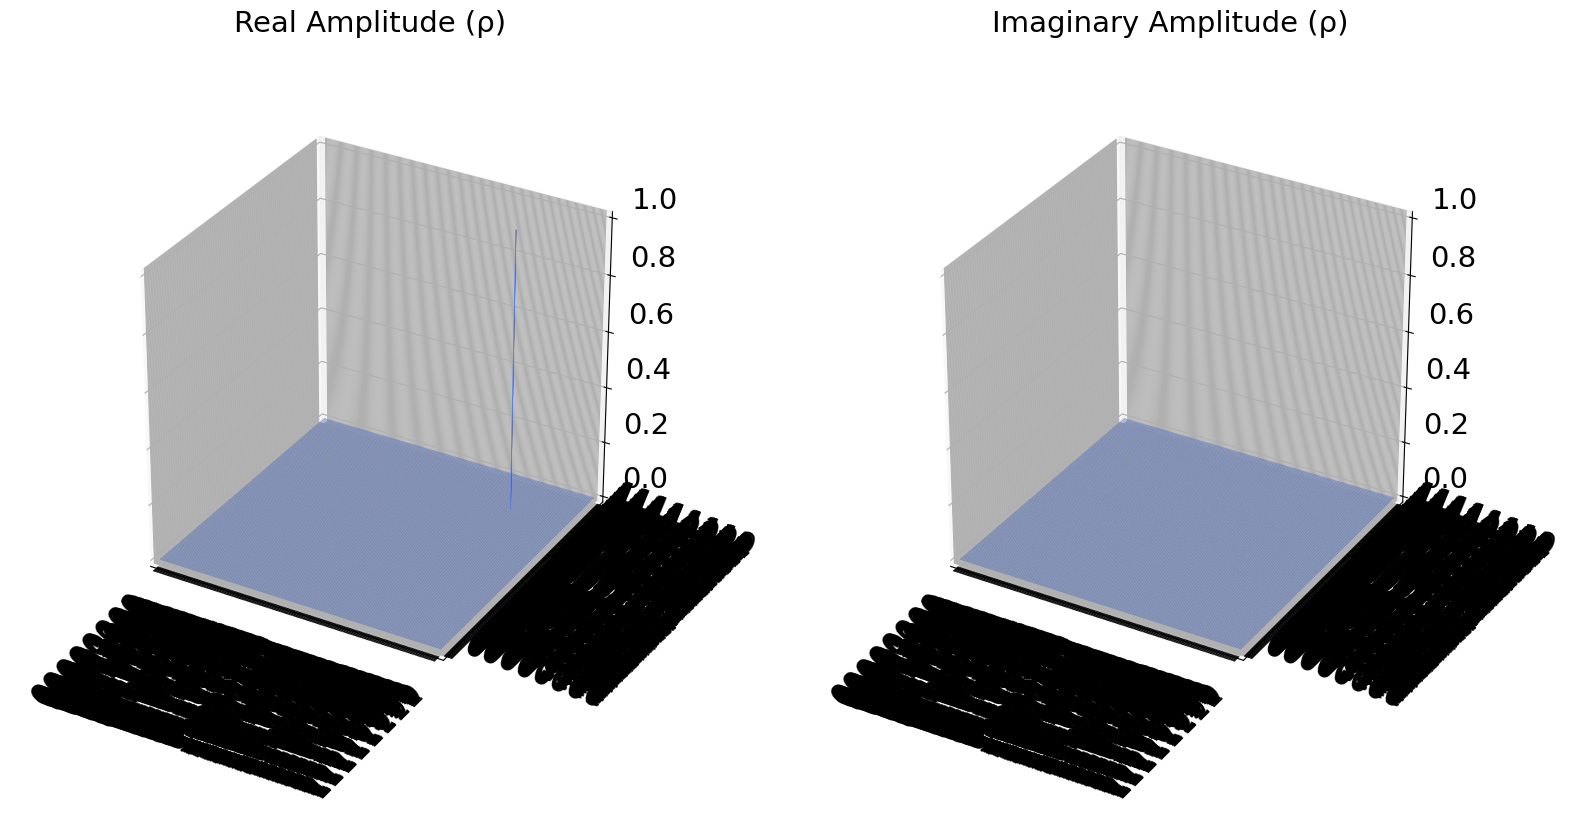

In [122]:
# Affichons un histogramme
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)